# Automating Regression with Scikit-Learn

## Introduction

[Scikit-Learn](http://scikit-learn.org/stable/) is a Python library for machine learning. It is powerful, easy to use, and contains a lot of functionality. Perhaps for these reaasons, it is also very widely used. Instead of programming models from scratch, we'll plug into Scikit-Learn's functionality. This will make our models more powerful, easier to experiment with, deploy, and much more maintainable.

In [2]:
# Load up the packages to investigate the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns

In [3]:
import os
# OS-independent way to navigate the file system
# Data directory is one directory up in relation to directory of this notebook
data_dir_root = os.path.normpath(os.getcwd() + os.sep + os.pardir)
# Where the file is
file_url = data_dir_root + os.sep + "Data" + os.sep + "food-truck-profits.txt"
# Load the data into a dataframe
data = pd.read_csv(file_url, header=None, names=['Population', 'Profit'])

In [17]:
X = data['Population'].values.reshape(-1,1)
y = data['Profit'].values.reshape(-1,1)

## Regression with One Feature

Let's take the restaurant profit data and use Scikit-Learn to create a regression.

In [4]:
from sklearn.linear_model import LinearRegression

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
[w_0, w_1] = np.array([lin_reg.intercept_, lin_reg.coef_]).flatten()
[w_0, w_1]

[-3.8957808783118502, 1.1930336441895935]

In [29]:
profits = (lin_reg.predict(X[0:5]) * 10000).flatten()
#print(profits)
print(['${:5,.0f}'.format(profit) for profit in profits])

['$33,938', '$26,990', '$62,672', '$44,593', '$30,952']


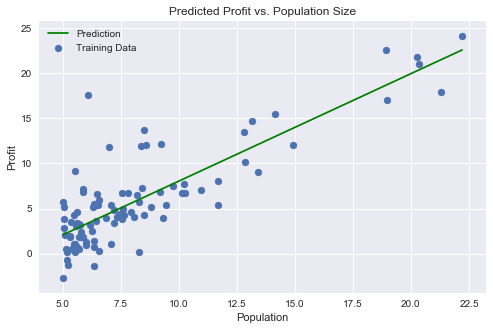

In [35]:
# What does the regression line look like?
# Create 100 equally spaced values going from the minimum value of population 
# to the maximum value of the population in the dataset.
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = (w_0 * 1) + (w_1 * x)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x, f, 'g', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')
ax.legend(loc='upper left')
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

## Regression with Multiple Features

In [36]:
# Load the housing prices dataset
file_url = data_dir_root + os.sep + "Data" + os.sep + "portland-house-prices.txt"
# Load the data into a dataframe
data2 = pd.read_csv(file_url, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [39]:
X = data2.iloc[:,0:2]
y = data2.iloc[:, 2:]

In [40]:
lin_reg_m = LinearRegression()
lin_reg_m.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
# Make some predictions
lin_reg_m.predict(X[0:5])

array([[ 356283.1103389 ],
       [ 286120.93063401],
       [ 397489.46984812],
       [ 269244.1857271 ],
       [ 472277.85514636]])